In [1]:
import pandas as pd
dataset=pd.read_csv("Tatacoffee13_21.csv",parse_dates=['Date'],index_col=['Date'])

In [2]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
from datetime import date,timedelta
import pandas as pd
startdate=pd.to_datetime("2013-01-01")
enddate=pd.to_datetime("2019-02-04")-timedelta(days=1)
all_date=pd.date_range(startdate,enddate,freq='d')

In [4]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [5]:
dummydate=dataset

In [6]:
dummydate.index=all_date

In [7]:
dummydate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


In [8]:
dummydate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2225 entries, 2013-01-01 to 2019-02-03
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2225 non-null   float64
 1   High    2225 non-null   float64
 2   Low     2225 non-null   float64
 3   Close   2225 non-null   float64
dtypes: float64(4)
memory usage: 86.9 KB


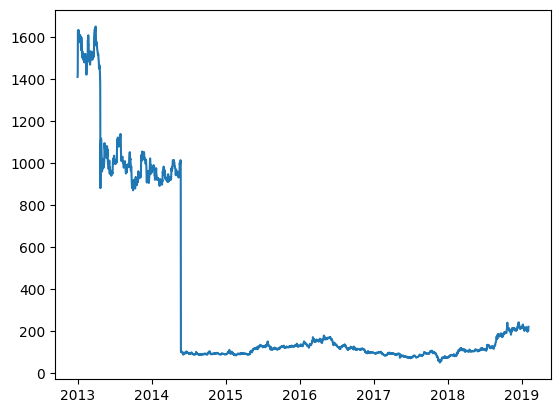

In [10]:
import matplotlib.pyplot as plt
plt.plot(dataset["Open"])

In [ ]:
#pip install statsmodels==0.13.5

<Figure size 1600x500 with 0 Axes>

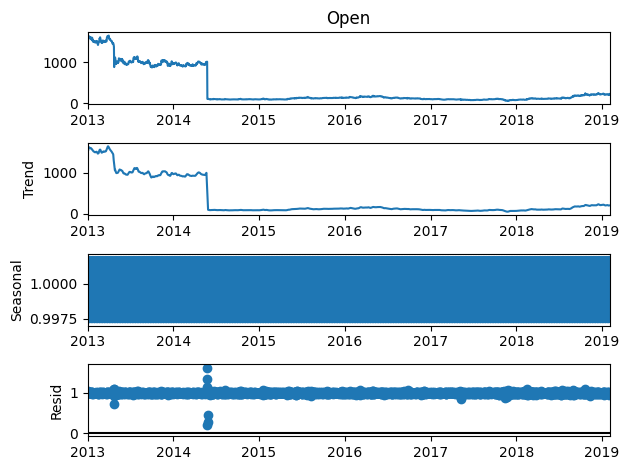

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummydate["Open"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

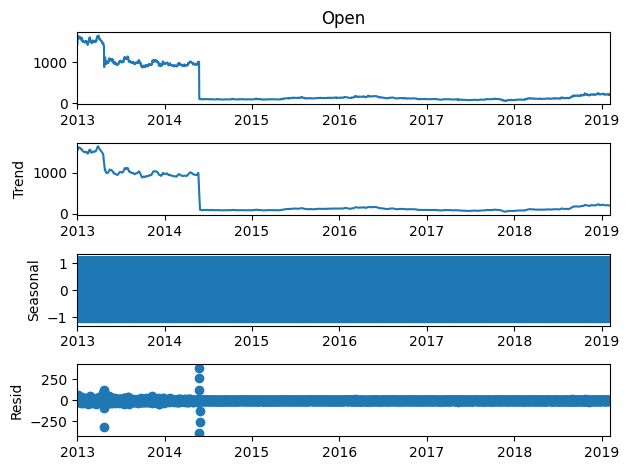

In [14]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummydate["Open"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

## Logic under Augmented Dicky Fuller Test funcion

In [35]:
#adfuller class is imported from the statsmodels.tsa.stattools package
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dataset["Low"])

In [36]:
#displays the value stored in dftest variable
#values are stored in a tuple format
print(dftest)

(-3.0552958774686436, 0.030043294422664377, 2, 2222, {'1%': -3.4332963863833688, '5%': -2.8628416262827505, '10%': -2.567462918171205}, 19958.212608055117)


In [37]:
#the values stored inside the 'dftest' variable are converted into series using pd.series()
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#displays the value stored in 'dfoutput' variable
print(dfoutput)

Test Statistic                   -3.055296
p-value                           0.030043
#Lags Used                        2.000000
Number of Observations Used    2222.000000
dtype: float64


In [38]:
#taking the first four values returned while calling adfuller() function
dftest[0:4]

(-3.0552958774686436, 0.030043294422664377, 2, 2222)

In [39]:
#the fifth value(critical value- stored in a dictionary format (key,value))
dftest[4]

{'1%': -3.4332963863833688,
 '5%': -2.8628416262827505,
 '10%': -2.567462918171205}

In [40]:
dftest[4].items()

dict_items([('1%', -3.4332963863833688), ('5%', -2.8628416262827505), ('10%', -2.567462918171205)])

In [41]:
#creating new index 'critical value'  for each items in the dftest[4], to include in the dfoutput series
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

In [42]:
#values stored in dfoutput
print(dfoutput)

Test Statistic                   -3.055296
p-value                           0.030043
#Lags Used                        2.000000
Number of Observations Used    2222.000000
Critical Value (1%)              -3.433296
Critical Value (5%)              -2.862842
Critical Value (10%)             -2.567463
dtype: float64


In [43]:
#newly created series is assigned to 'ans' variable
ans=dfoutput
print(ans)

Test Statistic                   -3.055296
p-value                           0.030043
#Lags Used                        2.000000
Number of Observations Used    2222.000000
Critical Value (1%)              -3.433296
Critical Value (5%)              -2.862842
Critical Value (10%)             -2.567463
dtype: float64


## Hypothesis Testing
## if test statistic < Critical value(1%) / test statistic < Critical value(5%) / test statistic < Critical value(10%) and p-value < 0.05
# Then, reject null hypothesis and accept alternate hypothesis

In [44]:

if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"

Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


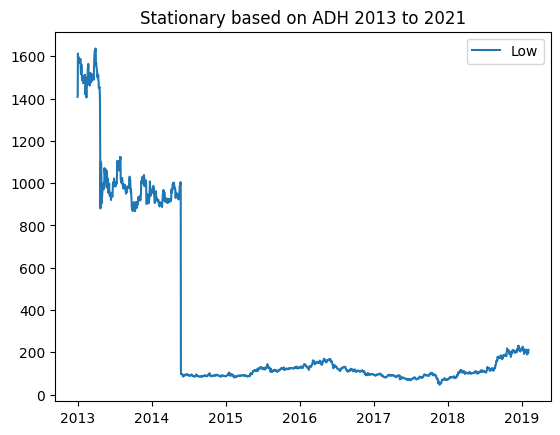

In [46]:
# Low column is plotted 
plt.plot(dataset.index, dataset["Low"],label="Low")
plt.legend(loc='best')
plt.title("Stationary based on ADH 2013 to 2021")
#plt.savefig("{}_ADH.png".format(Open))
plt.show()